### 第一章知识点

1. 修剪异常值

In [1]:
import numpy as np

In [2]:
a = np.array([1,3,5,7,9])
a

array([1, 3, 5, 7, 9])

In [3]:
#把值放在一个区间上的第一种方式
a[a>3]=0
a

array([1, 3, 0, 0, 0])

In [4]:
#第二种方式
a.clip(0,3)

array([1, 3, 0, 0, 0])

2. numpy，list，matrix运行时间的比较

In [5]:
%timeit sum([x*x for x in xrange(1000)]),1000

10000 loops, best of 3: 62.1 µs per loop


In [6]:
%timeit sum(np.arange(1000)*np.arange(1000)),1000

The slowest run took 21.93 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 105 µs per loop


In [7]:
%timeit np.arange(1000).dot(np.arange(1000)),1000

The slowest run took 9.42 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.27 µs per loop


列表速度优于数组，矩阵优于列表<br>
在实际运算中要时常考虑讲数组元素的循环处理从python中移到一些高度优化的Numpy和Scipy中<br>
然而，优化的速度是有代价的。当使用numpy也是一种数据类型，当numpy中含有多种数据类型时，numpy总是把数据类型转化为相同的类型

### 第一个极小机器学习应用
1. 读取数据

In [18]:
path = u'C:\机器学习与数据处理\机器学习与系统设计\ch01\data\web_traffic.tsv'
result = []
with open(path,'r') as f:
    for i in f.readlines():
        result.append(i.strip().split('\t'))

In [12]:
result

[['1', '2272'],
 ['2', 'nan'],
 ['3', '1386'],
 ['4', '1365'],
 ['5', '1488'],
 ['6', '1337'],
 ['7', '1883'],
 ['8', '2283'],
 ['9', '1335'],
 ['10', '1025'],
 ['11', '1139'],
 ['12', '1477'],
 ['13', '1203'],
 ['14', '1311'],
 ['15', '1299'],
 ['16', '1494'],
 ['17', '1159'],
 ['18', '1365'],
 ['19', '1272'],
 ['20', '1246'],
 ['21', '1071'],
 ['22', '1876'],
 ['23', 'nan'],
 ['24', '1410'],
 ['25', '925'],
 ['26', '1533'],
 ['27', '2104'],
 ['28', '2113'],
 ['29', '1993'],
 ['30', '1045'],
 ['31', '2090'],
 ['32', '2227'],
 ['33', '1413'],
 ['34', '1718'],
 ['35', '1721'],
 ['36', '1291'],
 ['37', '1838'],
 ['38', '2540'],
 ['39', '1608'],
 ['40', '2455'],
 ['41', '1929'],
 ['42', '1767'],
 ['43', '1203'],
 ['44', '1761'],
 ['45', '1723'],
 ['46', '2160'],
 ['47', '808'],
 ['48', 'nan'],
 ['49', '1324'],
 ['50', '1809'],
 ['51', '1933'],
 ['52', '1351'],
 ['53', '2013'],
 ['54', '1207'],
 ['55', '2170'],
 ['56', '1700'],
 ['57', '1899'],
 ['58', '1757'],
 ['59', '1475'],
 ['60', '19

In [19]:
import numpy as np
np.array(result,dtype='float64')

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

- 通过scipy的genfromtxt()也可以读取数据

In [48]:
import scipy as sp
data = sp.genfromtxt('web_traffic.tsv',delimiter='\t')

In [49]:
data.dtype

dtype('float64')

In [50]:
data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

2.预处理和清洗数据

In [51]:
x = data[:,0]
y = data[:,1]

In [54]:
sp.sum(sp.isnan(y))  #False的个数，注意sp.isnan

0

In [55]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

3.用散点图画出数据

In [60]:
%matplotlib inline

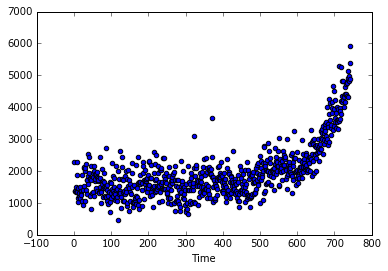

In [62]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('Time')

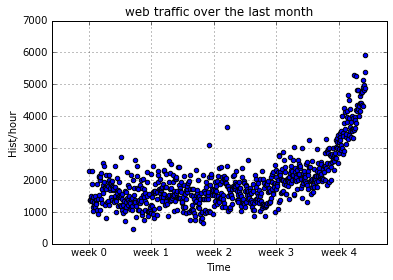

In [63]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title('web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hist/hour')
plt.xticks([w*7*24 for w in range(5)],['week %i'%w for w in range(5)])
plt.grid()

### 从一条简单曲线开始拟合

In [64]:
fp1,residuals,_,_,_ = sp.polyfit(x,y,1,full=True) #前两个参数分别为参数和残差

In [65]:
residuals #SSE

array([  3.17389767e+08])

In [67]:
fp1

array([   2.59619213,  989.02487106])

In [21]:
print sp.poly1d(fp1,variable='x')  #利用最小二乘法求的的一阶曲线

 
2.596 x + 989


In [68]:
f1 = sp.poly1d(fp1)
f1.r #获得y=0时 x的根

array([-380.95211078])

In [69]:
f1.c #展示系数

array([   2.59619213,  989.02487106])

In [70]:
f1.order #展示多项式维度

1

2.画出曲线

In [25]:
fx = sp.linspace(0,x[-1],1000)  #生成均匀分布的点,默认包含两侧点。arange根据step生成指定步长的点

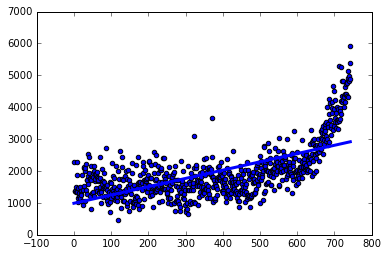

In [26]:
plt.scatter(x,y)
plt.plot(fx,f1(fx),lw=3)

3.尝试用二阶曲线拟合

In [71]:
f2p,residuals2,_,_,_ = sp.polyfit(x,y,2,full=True)

In [72]:
print f2p

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


In [73]:
f2 = sp.poly1d(f2p)
print f2

         2
0.01053 x - 5.265 x + 1975


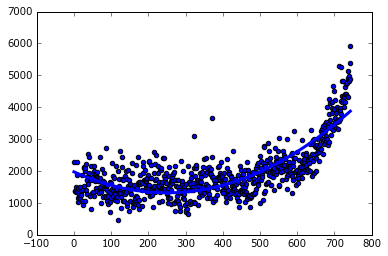

In [74]:
fx = sp.linspace(0,x[-1],1000)  
plt.scatter(x,y)
plt.plot(fx,f2(fx),lw=3)

In [75]:
residuals #SSE   二阶sse几乎是一阶的一半

array([  3.17389767e+08])

3.尝试用更高阶函数进行拟合

In [76]:
#高阶函数对多项式进行拟合
f1p = sp.polyfit(x,y,1)
f3p = sp.polyfit(x,y,3)
f10p = sp.polyfit(x,y,10)
f100p = sp.polyfit(x,y,100)

C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [77]:
#把拟合出的系数转化为多项式参数
f1 = sp.poly1d(f1p)
f3 = sp.poly1d(f3p)
f10 = sp.poly1d(f10p)
f100 = sp.poly1d(f100p)

In [78]:
def error(f,x,y):
    return sum((f(x)-y)**2)

In [79]:
err1 = error(f1,x,y)
err3 = error(f3,x,y)
err10 = error(f10,x,y)
err100 = error(f100,x,y)
print err1,err3,err10,err100

317389767.34 139350144.032 121942326.364 109452387.628


In [80]:
#SSE随多项式增加变化情况
errors = [error(i,x,y) for i in map(lambda x:sp.poly1d(x),[sp.polyfit(x,y,i) for i in range(20)])]

C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


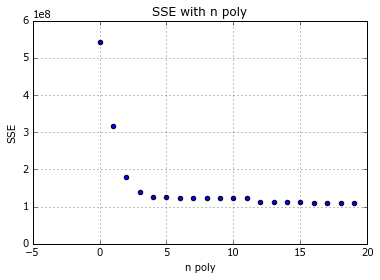

In [81]:
plt.title('SSE with n poly')
plt.scatter(range(20),errors)
plt.ylabel('SSE')
plt.xlabel('n poly')
plt.grid()
# n > 20时候，SSE基本不发生变化

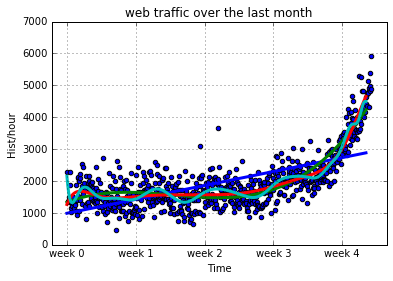

In [38]:
plt.scatter(x,y)
plt.title('web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hist/hour')
plt.xticks([w*7*24 for w in range(5)],['week %i'%w for w in range(5)])
plt.grid()
fx = sp.linspace(0,730,1000)
plt.plot(fx,f1(fx),lw=3)
plt.plot(fx,f3(fx),lw=3)
plt.plot(fx,f10(fx),lw=3)
plt.plot(fx,f100(fx),lw=3)

可以看到，曲线复杂度越高，拟合程度越好，SSE越小。但实际是否越复杂越好呢？我们对数据的理解是否正确呢？

数据在第三周的时候（550h）后有一个很明显的指数增长。能否把数据分成两部分，分别进行曲线的拟合呢？

In [82]:
def err(f,x,y):
    return sum((f(x)-y)**2)

In [83]:
x_after = x[550:]
y_after = y[550:]
x_befor = x[:550]
y_befor = y[:550]

In [84]:
f1p_after = sp.polyfit(x_after,y_after,1)
f1_after = sp.poly1d(f1p_after)
f1p_befor = sp.polyfit(x_befor,y_befor,1)
f1_befor = sp.poly1d(f1p_befor)
err(f1_after,x_after,y_after)+err(f1_befor,x_befor,y_befor)

142978521.89625415

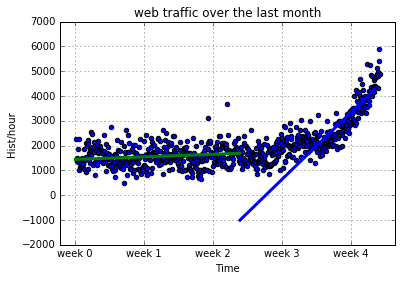

In [42]:
#曲线在训练集上的拟合表现：
plt.scatter(x,y)
plt.title('web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hist/hour')
plt.xticks([w*7*24 for w in range(5)],['week %i'%w for w in range(5)])
plt.grid()
fx = sp.linspace(0,730,1000)
plt.plot(fx[550:],f1_after(fx[550:]),lw=3)
plt.plot(fx[:550],f1_befor(fx[:550]),lw=3)

In [43]:
err(f1,x,y)

317389767.33977813

可以明显看出，分隔后的1次拟合sse降低了很多，但是相对与高阶拟合的sse还是会高一些。
让我们看下曲线拟合在测试集的表现如何？

In [85]:
f1p = sp.polyfit(x_after,y_after,1)
f3p = sp.polyfit(x_after,y_after,3)
f10p = sp.polyfit(x_after,y_after,10)
f100p = sp.polyfit(x_after,y_after,100)

C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [86]:
f1 = sp.poly1d(f1p)
f3 = sp.poly1d(f3p)
f10 = sp.poly1d(f10p)
f100 = sp.poly1d(f100p)

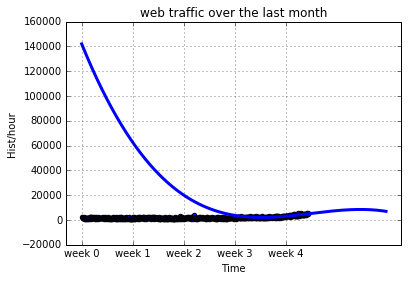

In [46]:
#曲线在训练集上的拟合表现：
plt.scatter(x,y)
plt.title('web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hist/hour')
plt.xticks([w*7*24 for w in range(5)],['week %i'%w for w in range(5)])
plt.grid()
fx = sp.linspace(0,1000,1000)
# plt.plot(fx,f1(fx),lw=3)
plt.plot(fx,f3(fx),lw=3)
# plt.plot(fx,f10(fx),lw=3)
# plt.plot(fx,f100(fx),lw=3)

由上图可以看出，曲线会发生很严重的震荡

## 代码学习

In [87]:
import os
import numpy as np
import scipy as sp
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [88]:
x = sp.arange(1, 31*24)
y = sp.array(200*(sp.sin(2*sp.pi*x/(7*24))), dtype=int)

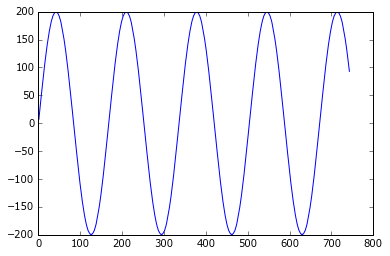

In [89]:
plt.plot(x,y)

In [14]:
%matplotlib inline

In [90]:
y = 2 * sp.exp(x/100.0)

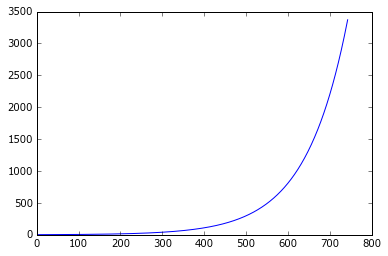

In [91]:
plt.plot(x,y)

In [3]:
import scipy as sp

In [4]:
path = 'C:\python\BuildingMachineLearningSystemsWithPython-master\ch01\data\web_traffic.tsv'
data = sp.genfromtxt(path,delimiter='\t')

In [6]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

In [127]:
x = data[:, 0]
y = data[:, 1]
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

print("Number of invalid entries:", sp.sum(sp.isnan(y)))

('Number of invalid entries:', 0)


In [17]:
%matplotlib inline

In [23]:
def plot_models(x, y, models,  mx=None, ymax=None, xmin=None):
    plt.figure(num=None, figsize=(8, 6))
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')

In [45]:
zip([sum], linestyles, colors)   #cao  原来函数还可以这么玩

[(<function sum>, '-', 'g')]

plt.autoscale(tight=True)#plt.autoscale()自动最佳化比例 

In [63]:
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp2: %s" % fp2)
print("Error of the model of fp2:", res2)
f2 = sp.poly1d(fp2)
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))

Model parameters of fp1: [   2.59619213  989.02487106]
('Error of the model of fp1:', array([  3.17389767e+08]))
Model parameters of fp2: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
('Error of the model of fp2:', array([  1.79983508e+08]))


C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [68]:
f100.order

53

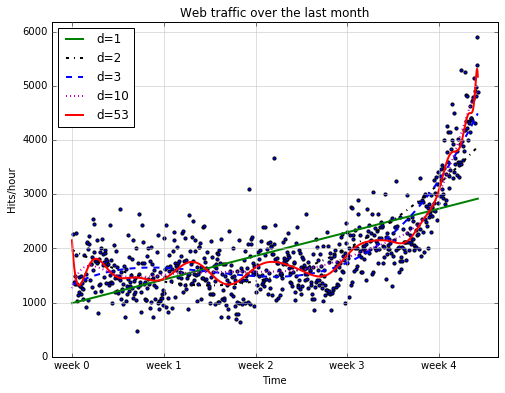

In [70]:
plot_models(
    x, y, [f1, f2, f3, f10, f100])

In [128]:
inflection = 3.5 * 7 * 24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [75]:
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

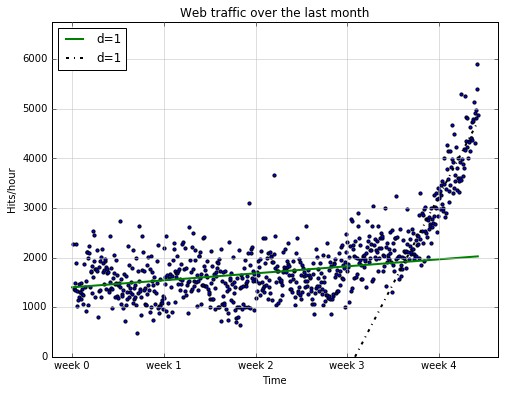

In [76]:
plot_models(x, y, [fa, fb])

In [84]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363643
Error d=53: 109452387.628177


In [89]:
print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905597
Error d=10: 21611594.264505
Error d=53: 18656080.321029


In [92]:
print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Error inflection=132950348.197616


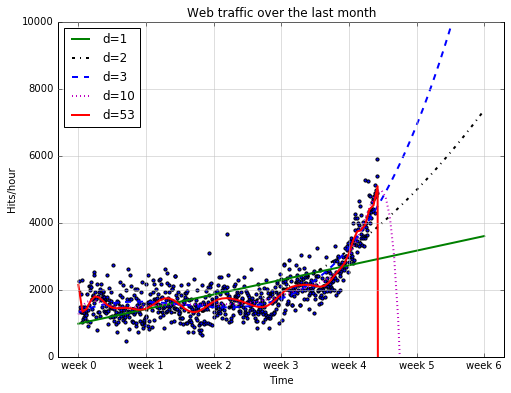

In [95]:
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [96]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

Trained only on data after inflection point


C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [97]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.834580
Error d=53: 18300846.032753


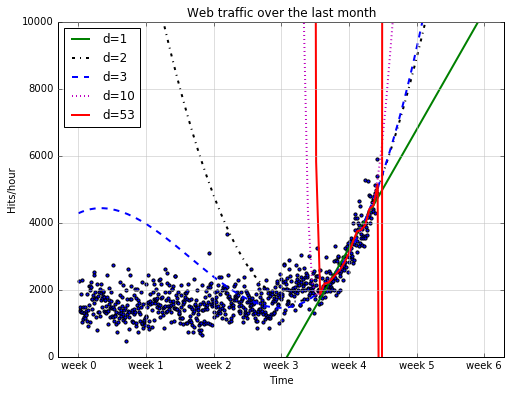

In [98]:
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [99]:
# separating training from testing data

In [133]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])    #30%数据作为测试集
train = sorted(shuffled[split_idx:])  #70%数据作为训练集

In [134]:
shuffled

array([ 89,  63,  36,  91, 111,  83,  34, 132,  68,  22,  76,  78,  29,
        56, 138,  82,  87, 141, 134,   9, 123, 106,  30, 107, 110,  77,
        27, 126,   4,  37, 122,  98,   5, 113,  92, 109,  33,  51,  26,
        95, 137,  28,  97,  47,  13, 131,   1,  11, 125,  60,  70,  58,
        31,  79,  84, 139,  69, 144,  74, 124, 140,  99,  42, 142,  40,
        93,  14, 118, 119, 128,  38, 146,  90,  57,  20,  96, 108,  75,
        24, 102, 112,  88, 100,  52,  32, 129,  80, 121,  10, 136,  43,
       104,   2,  15, 143, 145,  12,  49,  72, 133,  48,  85,  86,  21,
         3,  16, 115,   6,  50, 135,  81, 101,  73,  39,  45,  44,  59,
        19,  66, 103,  71,  35, 114,  64,  17,  65,  18,  67,  41, 127,
       117, 116,  61,  53, 130,  94, 120,  54,   8,  25,  46,   0,  55,
        23,  62,   7, 105])

In [135]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

fbt2(x)= 
         2
0.08318 x - 90.21 x + 2.614e+04
fbt2(x)-100,000= 
         2
0.08318 x - 90.21 x - 7.386e+04


C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [136]:
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 5228583.731882
Error d=2: 4872043.835826
Error d=3: 5331267.100660
Error d=10: 5376012.196327
Error d=53: 5579626.928371


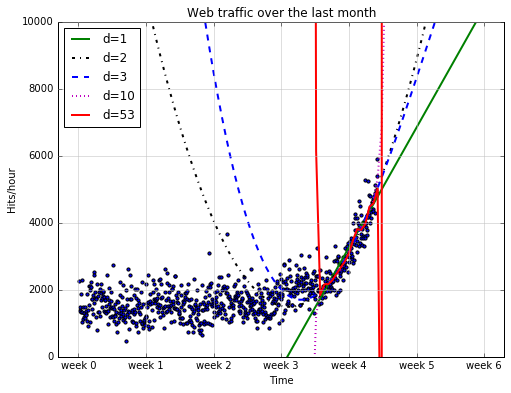

In [126]:
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [137]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)

         2
0.08318 x - 90.21 x + 2.614e+04
         2
0.08318 x - 90.21 x - 7.386e+04


In [152]:
reached_max = fsolve(fbt2 - 100000, x0=750) / (7 * 24)

In [153]:
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 9.699383
